## **TASK  (Finding Shortest path From Islamabad to Karachi using BFS)**

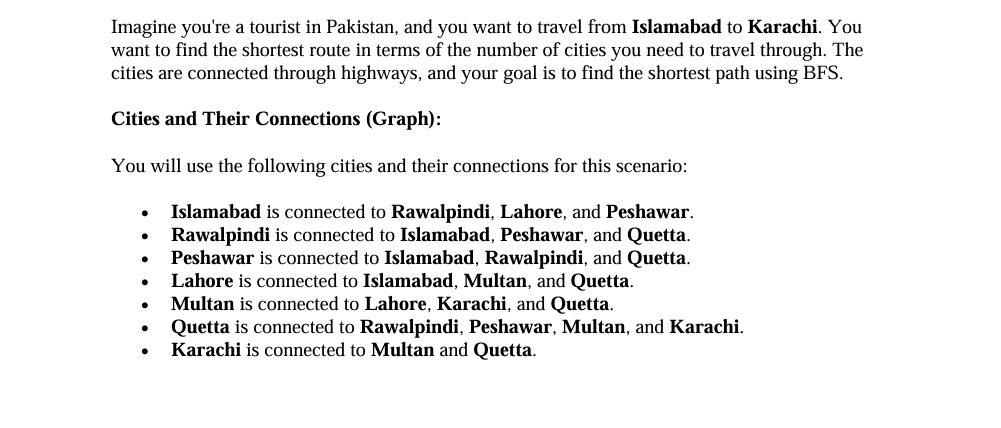

## graph 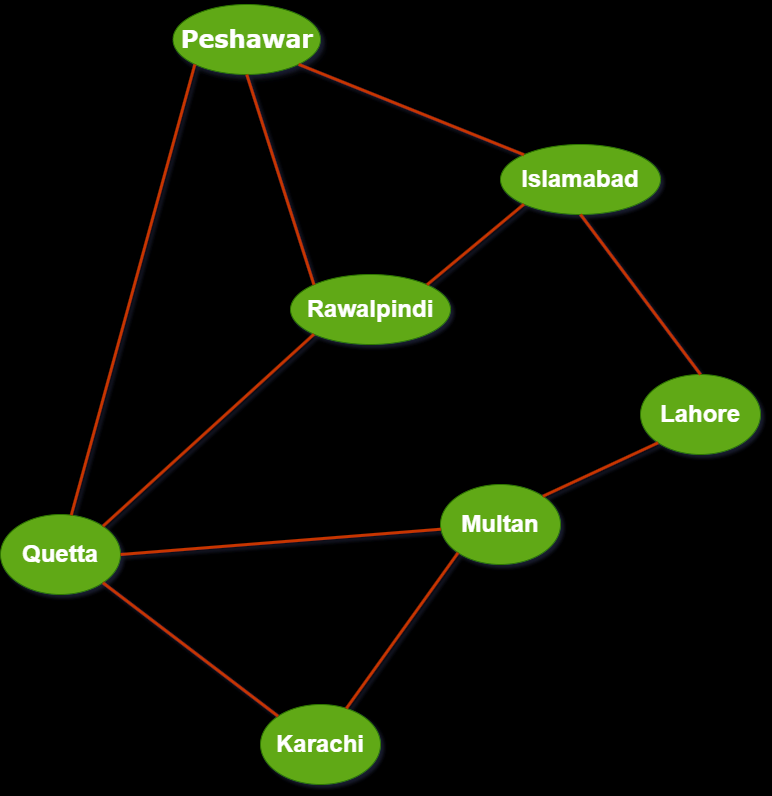

The shortest path from Islamabad to Karachi is: Islamabad -> Rawalpindi -> Quetta -> Karachi


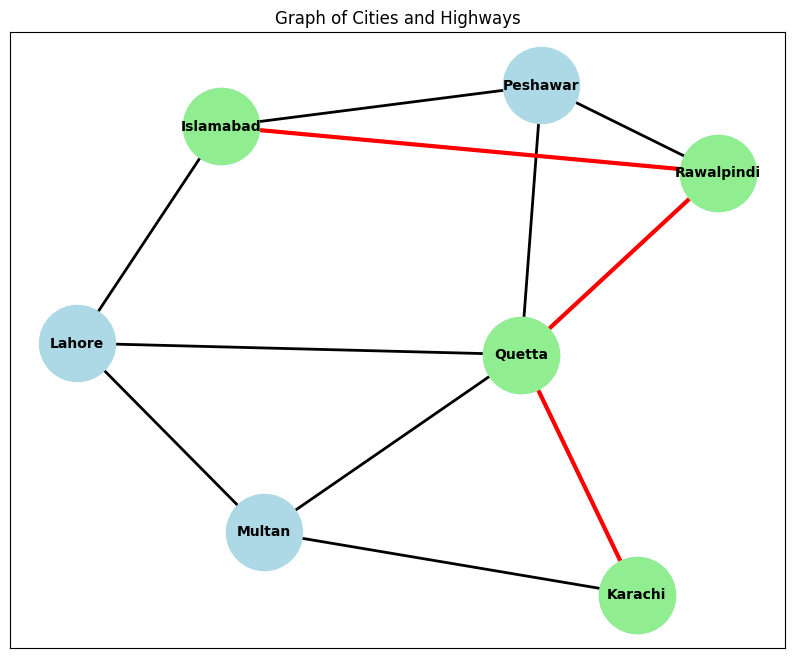

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

def bfs_shortest_path(graph, start, goal):
    # Queue for BFS
    queue = deque([[start]])
    # Set to keep track of visited nodes
    visited = set()

    while queue:
        # Get the first path from the queue
        path = queue.popleft()
        # Get the last city from the path
        city = path[-1]

        # If the city is the goal, return the path
        if city == goal:
            return path

        # If the city hasn't been visited, explore its neighbors
        if city not in visited:
            visited.add(city)
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    # If no path is found
    return None

def visualize_graph(graph, shortest_path=None):
    # Create a NetworkX graph
    G = nx.Graph()

    # Add edges to the graph
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Position the nodes using the spring layout
    pos = nx.spring_layout(G)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=2)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # If there is a shortest path, highlight it
    if shortest_path:
        # Get the list of edges in the shortest path
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        # Draw the shortest path with a different color
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
        # Highlight the nodes in the shortest path
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen', node_size=3000)

    # Show the plot
    plt.title("Graph of Cities and Highways")
    plt.show()

# Graph representing the cities and their connections
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Find the shortest path from Islamabad to Karachi
shortest_path = bfs_shortest_path(graph, 'Islamabad', 'Karachi')

if shortest_path:
    print("The shortest path from Islamabad to Karachi is:", ' -> '.join(shortest_path))
else:
    print("No path found from Islamabad to Karachi.")

# Visualize the graph and the shortest path if it exists
visualize_graph(graph, shortest_path)

